In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
x_data = df.iloc[:,:-1].values
y_onehot = pd.get_dummies(df['species']) # onehot encoding
y_data = y_onehot.values

In [5]:
x_data.shape

(150, 4)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.3, stratify=y_data) # stratify=y_data  label값이 골고루 분포되도록

In [7]:
x_train.shape

(105, 4)

In [8]:
x_test.shape

(45, 4)

In [9]:
y_train.shape

(105, 3)

In [10]:
y_test.shape

(45, 3)

In [11]:
x = torch.FloatTensor(x_train)
y = torch.FloatTensor(y_train)

In [12]:
model = Sequential()
model.add_module('nn1', Linear(4,3)) # (특성갯수, 라벨 갯수) w: 특성갯수 x 라벨 갯수, b: 라벨 갯수
model.add_module('softmax', Softmax(dim=1)) # 활성함수
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [13]:
hist=[]
for epoch in range(2000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Softmax(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print(epoch, cost.item())
    hist.append(cost.item())

0 1.103423833847046
1 1.0327551364898682
2 1.0490309000015259
3 1.0122867822647095
4 0.9452767968177795
5 0.8997080326080322
6 0.8988527059555054
7 0.8921130895614624
8 0.8660768270492554
9 0.8510897159576416
10 0.8432593941688538
11 0.8281107544898987
12 0.8111363649368286
13 0.818386971950531
14 0.8090813755989075
15 0.7903099656105042
16 0.7895209789276123
17 0.7863972783088684
18 0.7732176184654236
19 0.7654201984405518
20 0.7672268748283386
21 0.7593823671340942
22 0.7500715255737305
23 0.7492853999137878
24 0.7449947595596313
25 0.7356743216514587
26 0.732139527797699
27 0.7302625179290771
28 0.7228993773460388
29 0.7189975380897522
30 0.7177104949951172
31 0.7125120759010315
32 0.7081103324890137
33 0.7067214846611023
34 0.7026219964027405
35 0.6983389854431152
36 0.6966286897659302
37 0.6936346292495728
38 0.68987637758255
39 0.6881003379821777
40 0.6859822869300842
41 0.6828224658966064
42 0.6809097528457642
43 0.6791727542877197
44 0.6764934062957764
45 0.6744424104690552
46 

702 0.5817843675613403
703 0.5817707777023315
704 0.5817570686340332
705 0.5817435383796692
706 0.5817299485206604
707 0.5817164778709412
708 0.5817028880119324
709 0.5816894769668579
710 0.5816760659217834
711 0.581662654876709
712 0.5816492438316345
713 0.5816358923912048
714 0.5816225409507751
715 0.5816092491149902
716 0.5815960168838501
717 0.5815828442573547
718 0.5815695524215698
719 0.5815563797950745
720 0.5815432071685791
721 0.5815300941467285
722 0.5815169215202332
723 0.5815038681030273
724 0.5814908146858215
725 0.5814778208732605
726 0.5814647674560547
727 0.5814517736434937
728 0.5814387798309326
729 0.5814259052276611
730 0.5814129710197449
731 0.5814000964164734
732 0.5813871622085571
733 0.58137446641922
734 0.5813615918159485
735 0.5813488960266113
736 0.5813360214233398
737 0.5813233256340027
738 0.5813106298446655
739 0.5812979340553284
740 0.581285297870636
741 0.5812726616859436
742 0.581260085105896
743 0.5812474489212036
744 0.5812349319458008
745 0.5812223553

1296 0.5763447880744934
1297 0.5763381123542786
1298 0.576331377029419
1299 0.5763247013092041
1300 0.576318085193634
1301 0.5763114094734192
1302 0.5763046741485596
1303 0.5762980580329895
1304 0.5762913823127747
1305 0.5762847661972046
1306 0.5762780904769897
1307 0.5762714743614197
1308 0.5762648582458496
1309 0.5762582421302795
1310 0.5762516260147095
1311 0.5762450695037842
1312 0.5762383341789246
1313 0.5762317180633545
1314 0.5762251615524292
1315 0.5762185454368591
1316 0.5762119889259338
1317 0.5762054324150085
1318 0.5761987566947937
1319 0.5761922001838684
1320 0.5761855840682983
1321 0.5761790871620178
1322 0.5761725306510925
1323 0.5761659741401672
1324 0.5761594176292419
1325 0.5761528611183167
1326 0.5761463046073914
1327 0.5761397480964661
1328 0.5761331915855408
1329 0.5761266946792603
1330 0.576120138168335
1331 0.5761137008666992
1332 0.5761071443557739
1333 0.5761006474494934
1334 0.5760941505432129
1335 0.5760875940322876
1336 0.5760810971260071
1337 0.576074659824

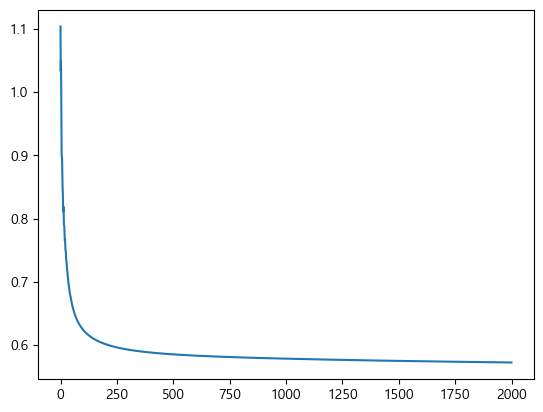

In [14]:
plt.plot(hist)
plt.show()

In [15]:
r = y.argmax(dim=1).numpy()

In [16]:
pred = model.forward(x).argmax(dim=1).detach().numpy()

In [17]:
f1_score(r, pred, average='macro')

0.9809368191721134

In [18]:
treal = y_test.argmax(axis=1)

In [19]:
tpred = model(torch.FloatTensor(x_test)).argmax(dim=1).detach().numpy()

In [20]:
f1_score(treal, tpred, average='macro')

0.9777530589543938

train ==(유사) test : 적합

train > test: 과적합 (학습횟수 줄임, early stop, 파라미터 튜닝)
    
train < test: 과소적합 (학습횟수 늘림, 파라미터 튜닝)